<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/Google_CaseStudy_Bike_Share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section A: Import Libraries and download the Cyclistic trip data

In [30]:
import requests
import pandas as pd
import zipfile
import os
import glob
import matplotlib.pyplot as plt

In [12]:
"""
urls = [
    "https://divvy-tripdata.s3.amazonaws.com/202101-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202102-divvy-tripdata.zip",
    "https://divvy-tripdata.s3.amazonaws.com/202103-divvy-tripdata.zip"
]
"""

' \nurls = [\n    "https://divvy-tripdata.s3.amazonaws.com/202101-divvy-tripdata.zip",\n    "https://divvy-tripdata.s3.amazonaws.com/202102-divvy-tripdata.zip",\n    "https://divvy-tripdata.s3.amazonaws.com/202103-divvy-tripdata.zip"\n]\n'

# Section B: Upload the Zipped data, convert to CSV and concaternate dataframe

In [14]:
# Directory to save and unzip the files
directory = "/content/sample_data"

# List of local file paths
file_paths = [
    "/content/202101-divvy-tripdata.zip",
    "/content/202102-divvy-tripdata.zip",
    "/content/202103-divvy-tripdata.zip"
]

for file_path in file_paths:
    # Open the zipfile
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        # Extract all the contents of the zipfile into the directory
        zip_ref.extractall(directory)

# Get a list of all CSV files in the directory
csv_files = glob.glob('/content/sample_data/*.csv')

# Read all CSV files into a list of DataFrames
dataframes = [pd.read_csv(filename) for filename in csv_files]

# Concatenate all the DataFrames in the list into a single DataFrame
all_data = pd.concat(dataframes, ignore_index=True)


In [15]:
all_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.012701,-87.666058,42.004583,-87.661406,member
1,0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.012701,-87.666058,42.019537,-87.669563,casual
2,E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.885795,-87.631101,41.884866,-87.627498,member
3,B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
4,83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.834733,-87.625827,41.838163,-87.645123,member


In [25]:
# Get the number of rows and columns
rows, cols = all_data.shape

# Print the number of rows and columns
print(f"There are {rows} rows and {cols} columns in the dataset.")


There are 374952 rows and 13 columns in the dataset.


In [29]:
# Calculate the sum of missing values
missing_values_sum = all_data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values and round it to 2 decimal places
missing_values_percentage = (all_data.isnull().sum() / all_data.shape[0] * 100).round(2).sort_values(ascending=False)

# Create a DataFrame from the sums and percentages
missing_values_df = pd.DataFrame({'Missing Values': missing_values_sum, 'Percentage %': missing_values_percentage})

# Display the DataFrame
missing_values_df


,Missing Values,Percentage %
end_station_name,32362,8.63
end_station_id,32362,8.63
start_station_name,27519,7.34
start_station_id,27519,7.34
end_lat,484,0.13
end_lng,484,0.13
ride_id,0,0.00
rideable_type,0,0.00
started_at,0,0.00
ended_at,0,0.00


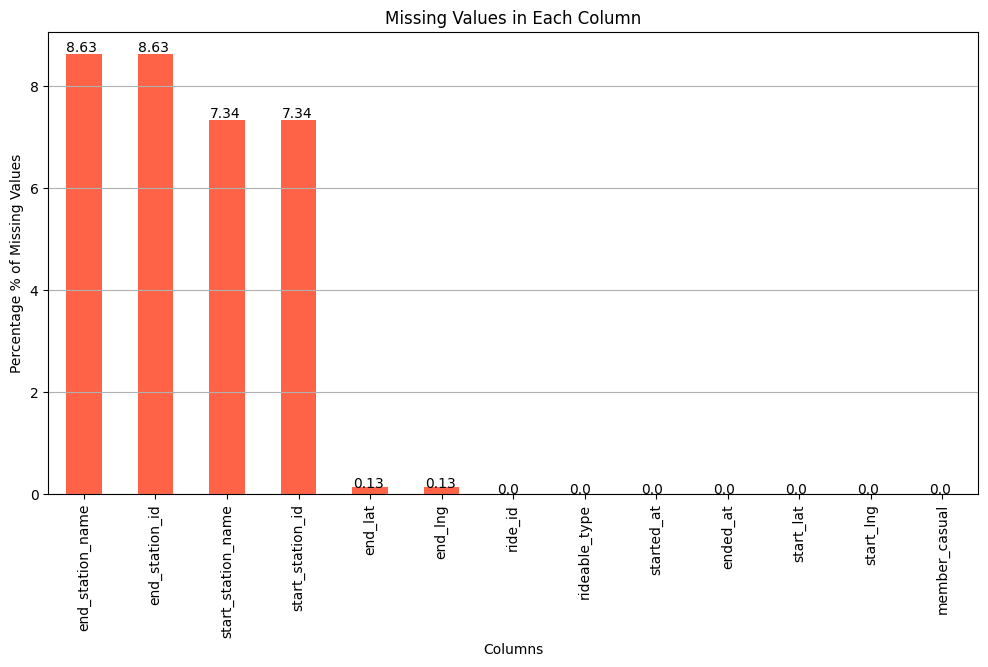

In [33]:
import matplotlib.pyplot as plt

# Create a bar chart of the missing values
ax = missing_values_df['Percentage %'].plot(kind='bar', figsize=(12, 6), color='tomato')

# Set the title and labels
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage % of Missing Values')

# Add gridlines
plt.grid(axis='y')

# Show the percentage values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()
